In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Load and preprocess
df = pd.read_csv('/home/shadowfiend/Documents/USTH/Year_3/Internship/DeffendThesis/Defend-Thesis/Data/Data_UF_cleaned.csv', encoding='latin1')
df['Churn'] = df['Cancellation Date'].notna().astype(int)


# Drop unusable and empty columns
df = df.drop(columns=[
    'Cancellation Date', 'Contract_ID', 'Creation Date', 'OrderID/RegCode'
])

# Choose relevant features
selected_cols = [
    'Gender', 'Age', 'Revenue', 'Payment Month',
    'Sales Channel', 'Internet Package', 'Sales Method', 'Churn'
]
df = df[selected_cols].dropna()

# One-hot encoding
df_encoded = pd.get_dummies(df, columns=['Sales Channel', 'Internet Package', 'Sales Method'], drop_first=True)

# Features and target
X = df_encoded.drop(columns='Churn')
y = df_encoded['Churn']

# Split and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

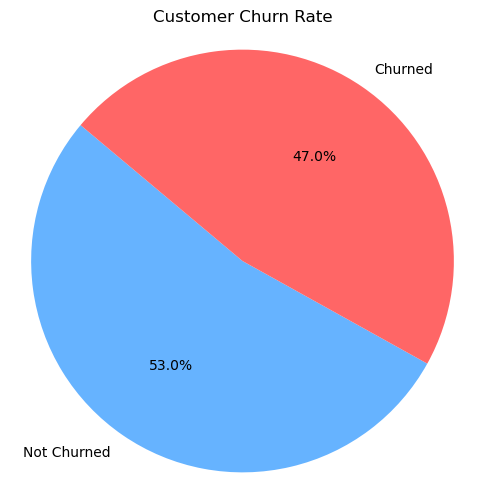

In [6]:
import matplotlib.pyplot as plt

# Count churn vs non-churn
churn_counts = df['Churn'].value_counts()
labels = ['Not Churned', 'Churned']
colors = ['#66b3ff', '#ff6666']

plt.figure(figsize=(6, 6))
plt.pie(churn_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Customer Churn Rate')
plt.axis('equal')
plt.show()


In [7]:
# Predict and evaluate
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.86      0.90      2361
           1       0.88      0.96      0.92      2581

    accuracy                           0.91      4942
   macro avg       0.92      0.91      0.91      4942
weighted avg       0.92      0.91      0.91      4942

